In [1]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape


(400, 26)

In [4]:
#Create a list of columns to retain
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [7]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if (df[column].dtype == np.float64):
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [8]:
df.head()


,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [9]:
#Split the data
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [10]:
#Feature Scaling
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [11]:
#Split the data into 80% training and 20% testing 
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=True)

In [12]:
#Build The model

model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [13]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [14]:
#Train the model
history = model.fit(X_train, y_train,epochs=2000, batch_size=X_train.shape[0]) 

Epoch 1/2000
1/1 [==============================] - 0s 344ms/step - loss: 0.6995 - accuracy: 0.5109
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5109
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5109
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.7904
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.9258
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.8952
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6533 - accuracy: 0.8646
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.8472
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6391 - accuracy: 0.8428
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6322 - accuracy: 0.8384
Epoch 11/2000
1/1

In [18]:
#Save the model
model.save("ckd.model")

INFO:tensorflow:Assets written to: ckd.model\assets


In [22]:
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


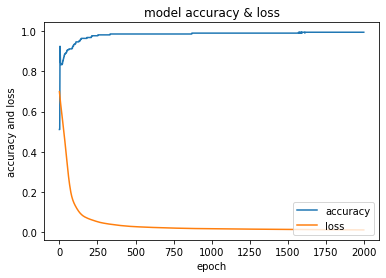

In [24]:
#Visualize the models accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['accuracy', 'loss'], loc='lower right')
plt.show()

In [25]:
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()

Model file:  ckd.model
2/2 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 1.0000

Original  : 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1

Predicted : 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1

Scores    : loss =  0.008770691230893135  acc =  1.0
---------------------------------------------------------



In [43]:
X_test
y_test

47     0
291    1
158    0
396    1
260    1
15     0
278    1
306    1
153    0
22     0
237    0
93     0
36     0
10     0
338    1
46     0
39     0
218    0
94     0
219    0
326    1
191    0
111    0
362    1
193    0
393    1
51     0
311    1
204    0
310    1
248    0
254    1
163    0
206    0
343    1
173    0
243    0
332    1
304    1
246    0
178    0
182    0
384    1
261    1
189    0
272    1
239    0
149    0
80     0
87     0
74     0
123    0
190    0
387    1
18     0
181    0
157    0
394    1
Name: classification, dtype: int64

In [44]:
d = {'sg':[0.66], 'al': [0.50], 'sc':[0.201655949],'hemo':[0.55758], 'pcv':[0.66748], 'htn':[0.1]}

df = pd.DataFrame(data=d)

In [45]:
print("Model file: ", model_file)
model = load_model(model_file)
pred = model.predict(df)
pred = [1 if y>=0.5 else 0 for y in pred]
scores = model.evaluate(df)
print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  

Model file:  ckd.model
1/1 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Predicted : 0
